# **Data Preparation**

In [ ]:
# Import library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from xgboost import XGBClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix,accuracy_score,roc_curve,classification_report
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.model_selection import cross_val_score

In [ ]:
# Import data
data = pd.read_csv('Weather Data.csv')
data.head()

,Date/Time,Temp_C,Dew Point Temp_C,Rel Hum_%,Wind Speed_km/h,Visibility_km,Press_kPa,Weather
0,1/1/2012 0:00,-1.8,-3.9,86,4,8.0,101.24,Fog
1,1/1/2012 1:00,-1.8,-3.7,87,4,8.0,101.24,Fog
2,1/1/2012 2:00,-1.8,-3.4,89,7,4.0,101.26,"Freezing Drizzle,Fog"
3,1/1/2012 3:00,-1.5,-3.2,88,6,4.0,101.27,"Freezing Drizzle,Fog"
4,1/1/2012 4:00,-1.5,-3.3,88,7,4.8,101.23,Fog


In [ ]:
# Melihat informasi data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8784 entries, 0 to 8783
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Date/Time         8784 non-null   object 
 1   Temp_C            8784 non-null   float64
 2   Dew Point Temp_C  8784 non-null   float64
 3   Rel Hum_%         8784 non-null   int64  
 4   Wind Speed_km/h   8784 non-null   int64  
 5   Visibility_km     8784 non-null   float64
 6   Press_kPa         8784 non-null   float64
 7   Weather           8784 non-null   object 
dtypes: float64(4), int64(2), object(2)
memory usage: 549.1+ KB


In [ ]:
# Melihat distribusi data
data.describe()

,Temp_C,Dew Point Temp_C,Rel Hum_%,Wind Speed_km/h,Visibility_km,Press_kPa
count,8784.000000,8784.000000,8784.000000,8784.000000,8784.000000,8784.000000
mean,8.798144,2.555294,67.431694,14.945469,27.664447,101.051623
std,11.687883,10.883072,16.918881,8.688696,12.622688,0.844005
min,-23.300000,-28.500000,18.000000,0.000000,0.200000,97.520000
25%,0.100000,-5.900000,56.000000,9.000000,24.100000,100.560000
50%,9.300000,3.300000,68.000000,13.000000,25.000000,101.070000
75%,18.800000,11.800000,81.000000,20.000000,25.000000,101.590000
max,33.000000,24.400000,100.000000,83.000000,48.300000,103.650000


# **Data Preprocessing**

**Handling Missing Values dan Data Duplikat**

In [ ]:
# Mengecek missing values
print("Jumlah data null")
data.isna().sum()

Jumlah data null


,0
Date/Time,0
Temp_C,0
Dew Point Temp_C,0
Rel Hum_%,0
Wind Speed_km/h,0
Visibility_km,0
Press_kPa,0
Weather,0


In [ ]:
# Mengecek data duplikat
print("Jumlah data duplikat")
data.duplicated().sum()

Jumlah data duplikat


0

**Data Cleaning**

In [ ]:
# Menghapus spasi di awal dan akhir kolom
data.columns = data.columns.str.strip()

In [ ]:
# Menghapus cuaca yang tidak sesuai
data = data[~data['Weather'].str.contains('Freezing Drizzle|Freezing Rain|Fog|Snow|Haze|Showers|,', case=False)]

In [ ]:
# Menghapus satu cuaca, jika ada 2
data['Weather'] = data['Weather'].str.split(',').str[0]

In [ ]:
data.head(10)

,Date/Time,Temp_C,Dew Point Temp_C,Rel Hum_%,Wind Speed_km/h,Visibility_km,Press_kPa,Weather
16,1/1/2012 16:00,2.6,-0.2,82,13,12.9,99.93,Mostly Cloudy
17,1/1/2012 17:00,3.0,0.0,81,13,16.1,99.81,Cloudy
18,1/1/2012 18:00,3.8,1.0,82,15,12.9,99.74,Rain
19,1/1/2012 19:00,3.1,1.3,88,15,12.9,99.68,Rain
20,1/1/2012 20:00,3.2,1.3,87,19,25.0,99.50,Cloudy
21,1/1/2012 21:00,4.0,1.7,85,20,25.0,99.39,Cloudy
23,1/1/2012 23:00,5.3,2.0,79,30,25.0,99.31,Cloudy
25,1/2/2012 1:00,4.6,0.0,72,39,25.0,99.26,Cloudy
26,1/2/2012 2:00,3.9,-0.9,71,32,25.0,99.26,Mostly Cloudy
27,1/2/2012 3:00,3.7,-1.5,69,33,25.0,99.30,Mostly Cloudy


**Normalisasi Data**

In [ ]:
# Conversion String to Date
data['Date/Time'] = pd.to_datetime(data['Date/Time'], format='%m/%d/%Y %H:%M')

In [ ]:
# Konversi data tetap desimal
data['Temp_C'] = data['Temp_C'].astype(float)
data['Dew Point Temp_C'] = data['Dew Point Temp_C'].astype(float)
data['Visibility_km'] = data['Visibility_km'].astype(float)
data['Press_kPa'] = data['Press_kPa'].astype(float)

In [ ]:
# Normalisasi data weather menjadi 3, yaitu Cloudy, Rain, dan Clear
mapping_weather = {
    'Mostly Cloudy': 'Cloudy',
    'Rain Showers': 'Rain',
    'Drizzle': 'Rain',
    'Thunderstorms': 'Rain',
    'Mainly Clear': 'Clear'
}
data['Weather'] = data['Weather'].replace(mapping_weather)

In [ ]:
# Encoding data weather
mapping = {'Clear': 0, 'Cloudy': 1, 'Rain': 2}
data['Weather_encoded'] = data['Weather'].map(mapping)

In [ ]:
data.head(10)

,Date/Time,Temp_C,Dew Point Temp_C,Rel Hum_%,Wind Speed_km/h,Visibility_km,Press_kPa,Weather,Weather_encoded
16,2012-01-01 16:00:00,2.6,-0.2,82,13,12.9,99.93,Cloudy,1
17,2012-01-01 17:00:00,3.0,0.0,81,13,16.1,99.81,Cloudy,1
18,2012-01-01 18:00:00,3.8,1.0,82,15,12.9,99.74,Rain,2
19,2012-01-01 19:00:00,3.1,1.3,88,15,12.9,99.68,Rain,2
20,2012-01-01 20:00:00,3.2,1.3,87,19,25.0,99.50,Cloudy,1
21,2012-01-01 21:00:00,4.0,1.7,85,20,25.0,99.39,Cloudy,1
23,2012-01-01 23:00:00,5.3,2.0,79,30,25.0,99.31,Cloudy,1
25,2012-01-02 01:00:00,4.6,0.0,72,39,25.0,99.26,Cloudy,1
26,2012-01-02 02:00:00,3.9,-0.9,71,32,25.0,99.26,Cloudy,1
27,2012-01-02 03:00:00,3.7,-1.5,69,33,25.0,99.30,Cloudy,1


**Ekspor Data Bersih**

In [ ]:
# Mengekspor data yang sudah bersih ke file CSV
output_file_path = '/content/Cleaned_data.csv'
data.to_csv(output_file_path, index=False)

# **Exploratory Data Analysis**

In [ ]:
# EDA data bersih
df = pd.read_csv('Cleaned_data.csv')
df.head()

,Date/Time,Temp_C,Dew Point Temp_C,Rel Hum_%,Wind Speed_km/h,Visibility_km,Press_kPa,Weather,Weather_encoded
0,2012-01-01 16:00:00,2.6,-0.2,82,13,12.9,99.93,Cloudy,1
1,2012-01-01 17:00:00,3.0,0.0,81,13,16.1,99.81,Cloudy,1
2,2012-01-01 18:00:00,3.8,1.0,82,15,12.9,99.74,Rain,2
3,2012-01-01 19:00:00,3.1,1.3,88,15,12.9,99.68,Rain,2
4,2012-01-01 20:00:00,3.2,1.3,87,19,25.0,99.50,Cloudy,1


Data Outliers pada Temp_C: 0
Data Outliers pada Dew Point Temp_C: 0
Data Outliers pada Rel Hum_%: 0
Data Outliers pada Wind Speed_km/h: 73
Data Outliers pada Visibility_km: 0
Data Outliers pada Press_kPa: 41

VISUALISASI OUTLIERS



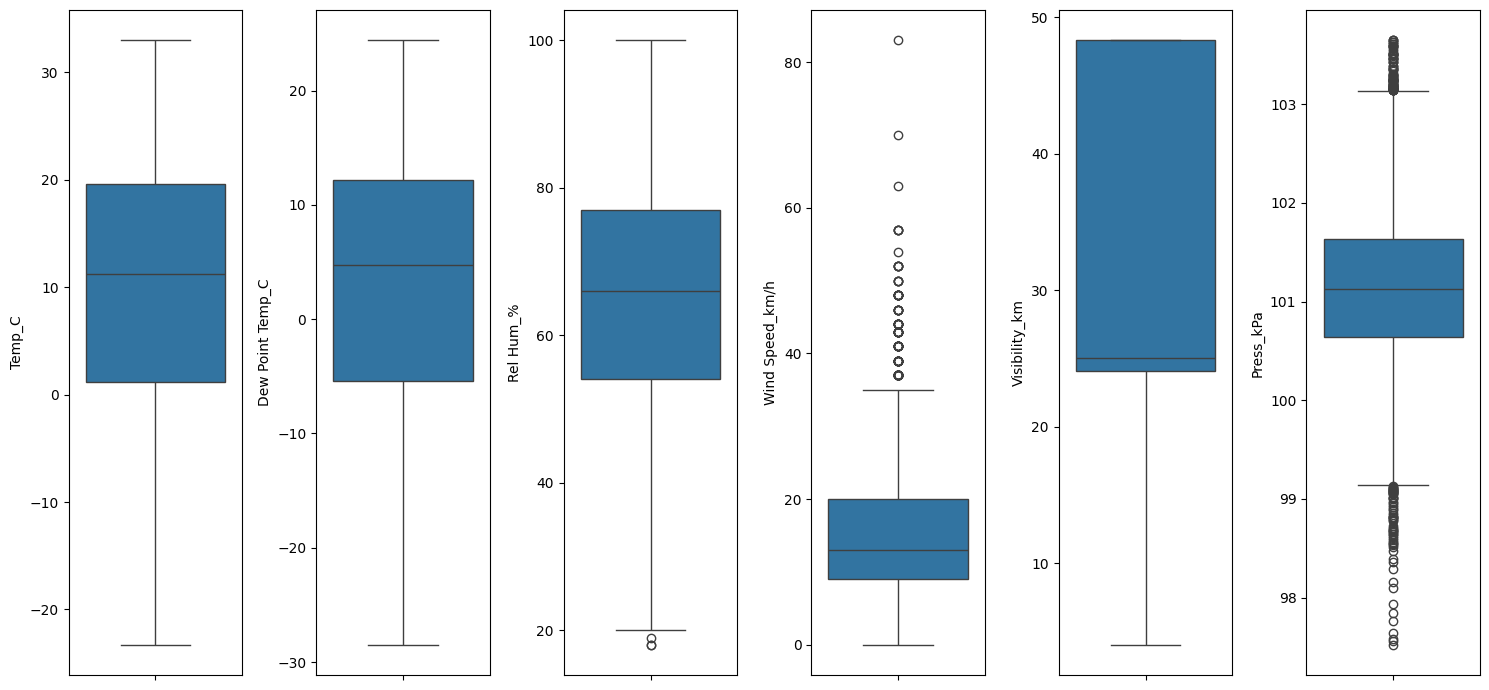

In [ ]:
# Melihat data outliers
numeric_columns = df.select_dtypes(include='number').columns
excluded_columns = ['Weather_encoded']

numeric_features = [col for col in numeric_columns if col not in excluded_columns]
outliers = {}

for feature in numeric_features:
    z_scores = np.abs(stats.zscore(df[feature]))
    outliers[feature] = df[z_scores > 3]

    print(f"Data Outliers pada {feature}: {outliers[feature].shape[0]}")

# Visualisasi
print("\nVISUALISASI OUTLIERS\n")

plt.figure(figsize=(15, 7))
for i, feature in enumerate(numeric_features):
    plt.subplot(1, len(numeric_features), i+1)
    sns.boxplot(y=df[feature])

plt.tight_layout()
plt.show()

Weather
Cloudy    3797
Clear     3432
Rain       349
Name: count, dtype: int64




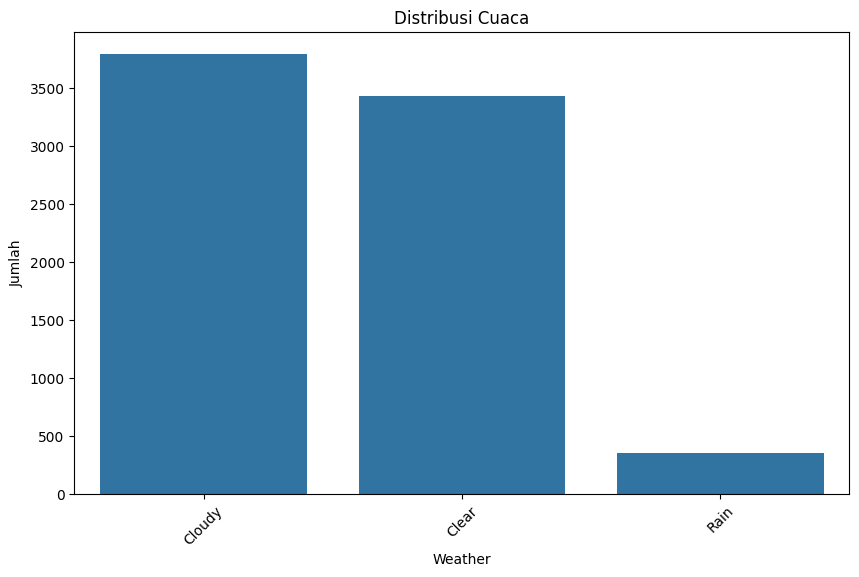

In [ ]:
# Jumlah data berdasarkan cuaca
weather_counts = df['Weather'].value_counts()
print(weather_counts)
print ("\n")

plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='Weather', order=df['Weather'].value_counts().index)
plt.title("Distribusi Cuaca")
plt.xticks(rotation=45)
plt.ylabel("Jumlah")
plt.show()

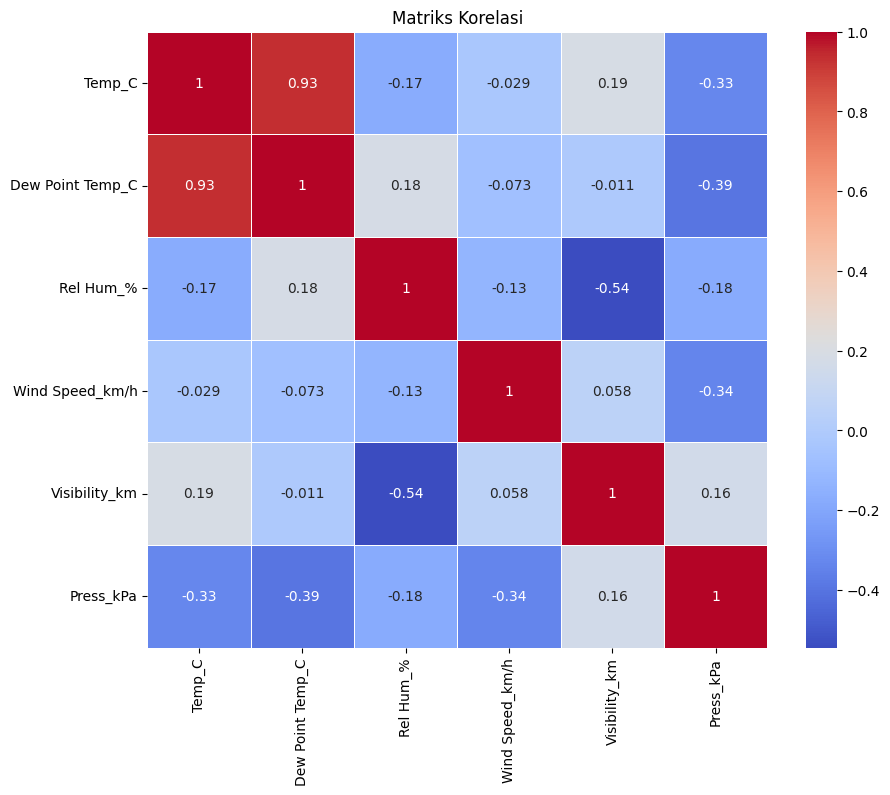

In [ ]:
# Matrix Korelasi
plt.figure(figsize=(10, 8))

sns.heatmap(df[numeric_features].corr(), annot=True, cmap='coolwarm', linewidths=0.5)
plt.title("Matriks Korelasi")
plt.show()

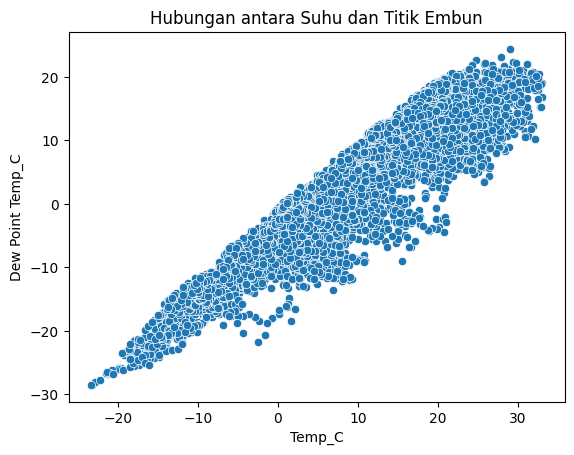

In [ ]:
# Melihat hubungan antara suhu dan titik embun
sns.scatterplot(x='Temp_C', y='Dew Point Temp_C', data=df)
plt.title('Hubungan antara Suhu dan Titik Embun')
plt.show()

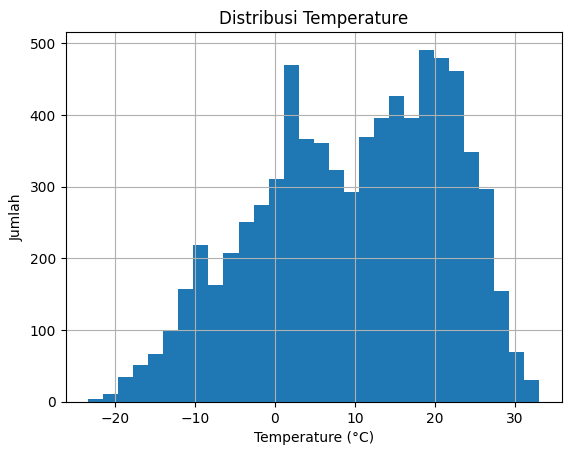

In [ ]:
# Distribusi temperature suhu
df['Temp_C'].hist(bins=30)
plt.title('Distribusi Temperature')
plt.xlabel('Temperature (°C)')
plt.ylabel('Jumlah')
plt.show()

# **Data Modelling**

In [ ]:
# Features and Target
X = data[['Temp_C', 'Dew Point Temp_C', 'Rel Hum_%', 'Wind Speed_km/h', 'Visibility_km', 'Press_kPa']]
y = data['Weather_encoded']

In [ ]:
# Memisahkan data training and testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Normalisasi fitur numerik
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

Random Forest

In [ ]:
m1 = "Random Forest"

In [ ]:
# Grid untuk Random Forest
param_grid_rf = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt', 'log2']
}

# Inisialisasi model
rf = RandomForestClassifier(random_state=42)

# Grid Search CV
grid_search_rf = GridSearchCV(estimator=rf, param_grid=param_grid_rf, cv=5, scoring='accuracy', verbose=2, n_jobs=-1)
grid_search_rf.fit(X_train_scaled, y_train)

Fitting 5 folds for each of 324 candidates, totalling 1620 fits


/usr/local/lib/python3.10/dist-packages/joblib/externals/loky/process_executor.py:752: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:540: FitFailedWarning: 
540 fits failed out of a total of 1620.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
405 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py"

GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42), n_jobs=-1,
             param_grid={'max_depth': [None, 10, 20, 30],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [50, 100, 200]},
             scoring='accuracy', verbose=2)

In [ ]:
# Ambil parameter terbaik dari hasil GridSearchCV
best_params_rf = grid_search_rf.best_params_

# Inisialisasi model Random Forest dengan parameter terbaik
rf = RandomForestClassifier(**best_params_rf, random_state=42)

# Latih model dengan data training
rf.fit(X_train_scaled, y_train)

# Prediksi pada data testing
rf_predictions = rf.predict(X_test_scaled)

Gradient Boosting

In [ ]:
m2 = "Gradient Boosting"

In [ ]:
# Grid untuk Gradient Boosting
param_grid_gb = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 5, 7],
    'subsample': [0.8, 1.0],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Inisialisasi model
gb = GradientBoostingClassifier(random_state=42)

# Grid Search CV
grid_search_gb = GridSearchCV(estimator=gb,  param_grid=param_grid_gb, cv=5, scoring='accuracy', verbose=2, n_jobs=-1)
grid_search_gb.fit(X_train_scaled, y_train)

Fitting 5 folds for each of 486 candidates, totalling 2430 fits


GridSearchCV(cv=5, estimator=GradientBoostingClassifier(random_state=42),
             n_jobs=-1,
             param_grid={'learning_rate': [0.01, 0.1, 0.2],
                         'max_depth': [3, 5, 7], 'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [50, 100, 200],
                         'subsample': [0.8, 1.0]},
             scoring='accuracy', verbose=2)

In [ ]:
# Ambil parameter terbaik dari hasil GridSearchCV
best_params_gb = grid_search_gb.best_params_

# Inisialisasi model Gradient Boosting dengan parameter terbaik
gb = GradientBoostingClassifier(**best_params_gb, random_state=42)

# Latih model dengan data training
gb.fit(X_train_scaled, y_train)

# Prediksi pada data testing
gb_predictions = gb.predict(X_test_scaled)

# **Evaluation**

Random Forest

---



Akurasi Model

In [ ]:
rf_accuracy = accuracy_score(y_test, rf_predictions)
print("Akurasi Model Random Forest :", rf_accuracy)

Akurasi Model Random Forest : 0.753957783641161


Classification Report

In [ ]:
report_rf = classification_report(y_test, rf_predictions)
print("Classification Report Random Forest:")
print(report_rf)

Classification Report Random Forest:
              precision    recall  f1-score   support

           0       0.75      0.77      0.76       680
           1       0.76      0.76      0.76       762
           2       0.78      0.57      0.66        74

    accuracy                           0.75      1516
   macro avg       0.76      0.70      0.72      1516
weighted avg       0.75      0.75      0.75      1516



Confussion Matrix

In [ ]:
conf_matrix_rf = confusion_matrix(y_test, rf_predictions)
print("Confusion Matrix:")
print(conf_matrix_rf)

Confusion Matrix:
[[524 156   0]
 [173 577  12]
 [  3  29  42]]


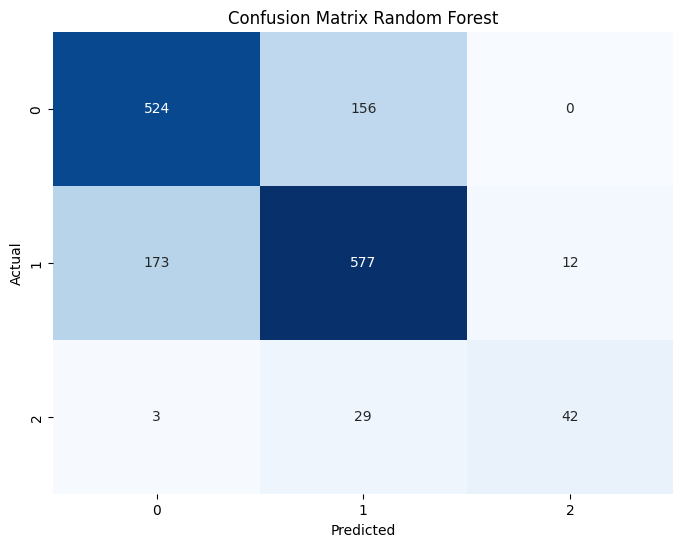

In [ ]:
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_rf, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix Random Forest')
plt.show()

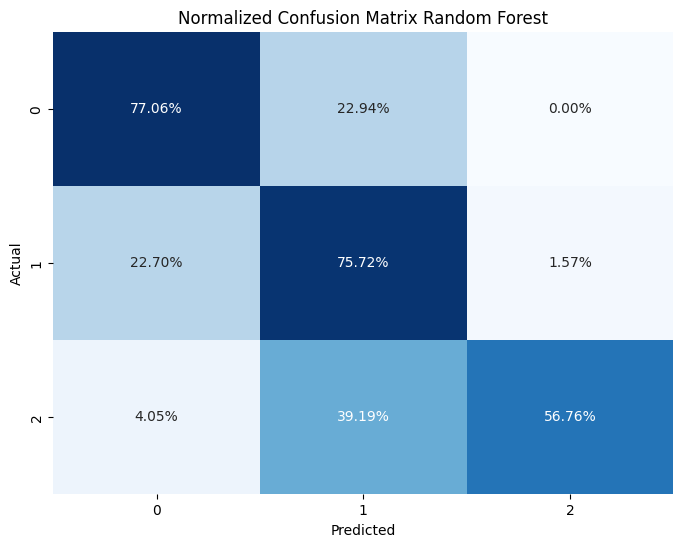

In [ ]:
conf_matrix_rf_per = confusion_matrix(y_test, rf_predictions)
conf_matrix_normalized_rf = conf_matrix_rf_per / conf_matrix_rf_per.sum(axis=1, keepdims=True)

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_normalized_rf, annot=True, fmt=".2%", cmap='Blues', cbar=False)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Normalized Confusion Matrix Random Forest')
plt.show()

AUC Score

In [ ]:
y_prob_rf = rf.predict_proba(X_test_scaled)
auc_score_rf = roc_auc_score(y_test, y_prob_rf, multi_class='ovr')
print("AUC Score Random Forest :", auc_score_rf)

AUC Score Random Forest : 0.8882161672375005


Feature Importance

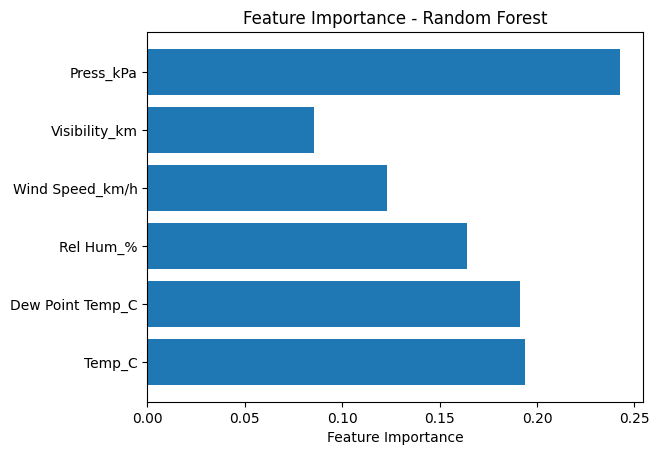

In [ ]:
importance_rf = rf.feature_importances_
feature_names = X.columns
plt.barh(feature_names, importance_rf)
plt.xlabel("Feature Importance")
plt.title("Feature Importance - Random Forest")
plt.show()

Cross-Validated Accuracy

In [ ]:
scores_rf = cross_val_score(rf, X_train_scaled, y_train, cv=5, scoring='accuracy')
print("Cross-Validated Accuracy (Random Forest):", scores_rf.mean())

Cross-Validated Accuracy (Random Forest): 0.7335835108655135


Gradient Boosting

---



Akurasi Model

In [ ]:
gb_accuracy = accuracy_score(y_test, gb_predictions)
print("Akurasi Model Gradient Boosting :", gb_accuracy)

Akurasi Model Gradient Boosting : 0.7407651715039578


Classification Report

In [ ]:
report_gb = classification_report(y_test, gb_predictions)
print("Classification Report Gradient Boosting:")
print(report_gb)

Classification Report Gradient Boosting:
              precision    recall  f1-score   support

           0       0.73      0.76      0.75       680
           1       0.75      0.74      0.74       762
           2       0.78      0.54      0.64        74

    accuracy                           0.74      1516
   macro avg       0.75      0.68      0.71      1516
weighted avg       0.74      0.74      0.74      1516



Confussion Matrix

In [ ]:
conf_matrix_gb = confusion_matrix(y_test, gb_predictions)
print("Confusion Matrix Gradient Boosting:")
print(conf_matrix_gb)

Confusion Matrix Gradient Boosting:
[[517 163   0]
 [185 566  11]
 [  4  30  40]]


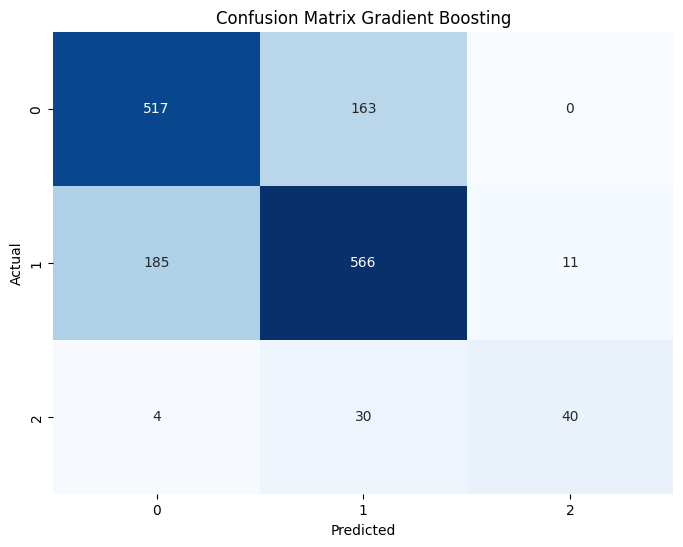

In [ ]:
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_gb, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix Gradient Boosting')
plt.show()

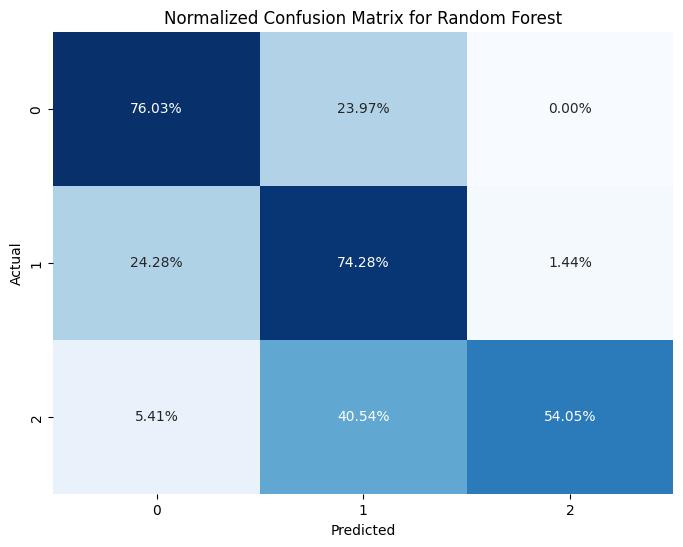

In [ ]:
conf_matrix_gb_per = confusion_matrix(y_test, gb_predictions)
conf_matrix_normalized_gb = conf_matrix_gb_per / conf_matrix_gb_per.sum(axis=1, keepdims=True)

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_normalized_gb, annot=True, fmt=".2%", cmap='Blues', cbar=False)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Normalized Confusion Matrix for Random Forest')
plt.show()

AUC Score

In [ ]:
y_prob_gb = gb.predict_proba(X_test_scaled)
auc_score_gb = roc_auc_score(y_test, y_prob_gb, multi_class='ovr')
print("AUC Score Gradient Boosting :", auc_score_gb)

AUC Score Gradient Boosting : 0.8675999652190501


Feature Importance

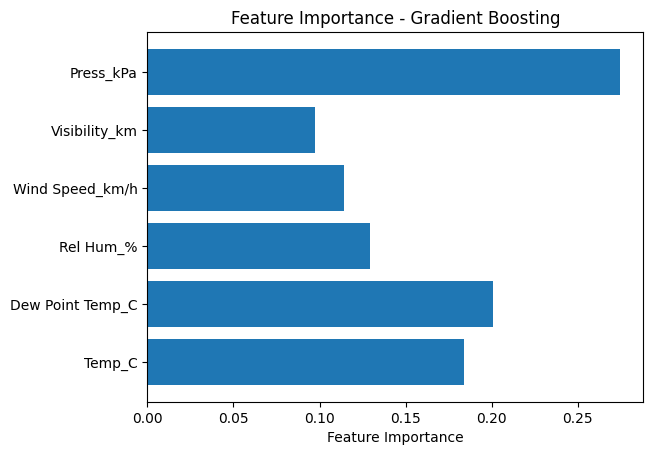

In [ ]:
importance_gb = gb.feature_importances_
plt.barh(feature_names, importance_gb)
plt.xlabel("Feature Importance")
plt.title("Feature Importance - Gradient Boosting")
plt.show()

Cross-Validated Accuracy

In [ ]:
scores_gb = cross_val_score(gb, X_train_scaled, y_train, cv=5, scoring='accuracy')
print("Cross-Validated Accuracy (Gradient Boosting):", scores_gb.mean())

Cross-Validated Accuracy (Gradient Boosting): 0.7235207692244905


Result

---



Perbandingan Akurasi Model

In [ ]:
results = {"Models": [m1, m2],
           "Accuracy": [rf_accuracy, gb_accuracy]}

for (key, value) in results.items():
    if key=="Accuracy":
        results[key]=  [item*100 for item in results[key]]


result_data=pd.DataFrame(results)

In [ ]:
result_data

,Models,Accuracy
0,Random Forest,75.395778
1,Gradient Boosting,74.076517


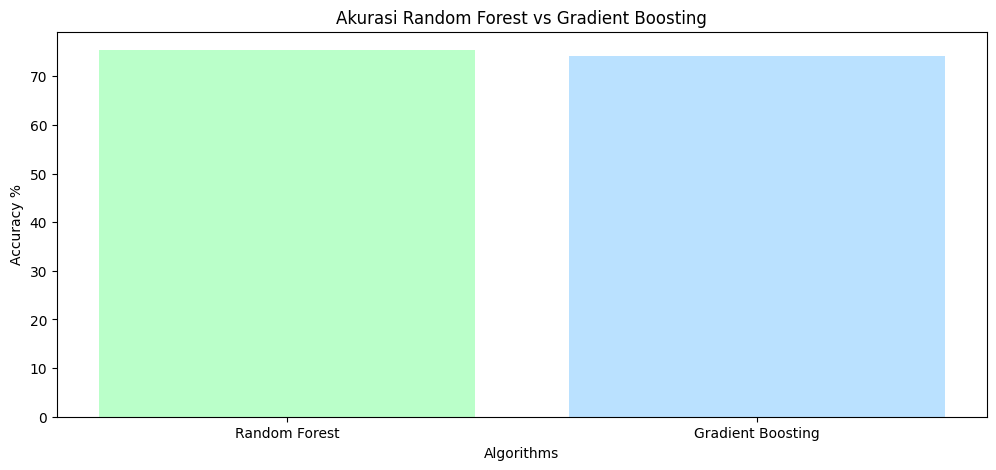

In [ ]:
colors = ['#BAFFC9', '#BAE1FF']
plt.figure(figsize=(12,5))
plt.title("Akurasi Random Forest vs Gradient Boosting")
plt.xlabel("Algorithms")
plt.ylabel("Accuracy %")
plt.bar(result_data['Models'],result_data['Accuracy'],color = colors)
plt.show()

Perbandingan Kurva ROC

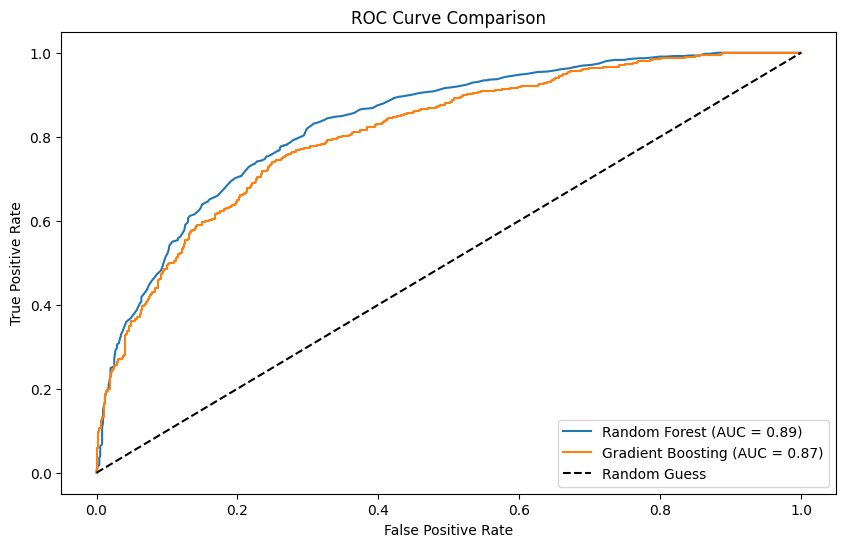

In [ ]:
fpr_rf, tpr_rf, _ = roc_curve(y_test, y_prob_rf[:, 1], pos_label=1)
fpr_gb, tpr_gb, _ = roc_curve(y_test, y_prob_gb[:, 1], pos_label=1)

# Plot ROC Curve
plt.figure(figsize=(10, 6))
plt.plot(fpr_rf, tpr_rf, label=f'Random Forest (AUC = {auc_score_rf:.2f})')
plt.plot(fpr_gb, tpr_gb, label=f'Gradient Boosting (AUC = {auc_score_gb:.2f})')
plt.plot([0, 1], [0, 1], 'k--', label="Random Guess")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve Comparison")
plt.legend(loc="lower right")
plt.show()

Cross-Validation Scores per Fold

In [ ]:
import pandas as pd
cv_results = pd.DataFrame({
    'Random Forest': scores_rf,
    'Gradient Boosting': scores_gb
})

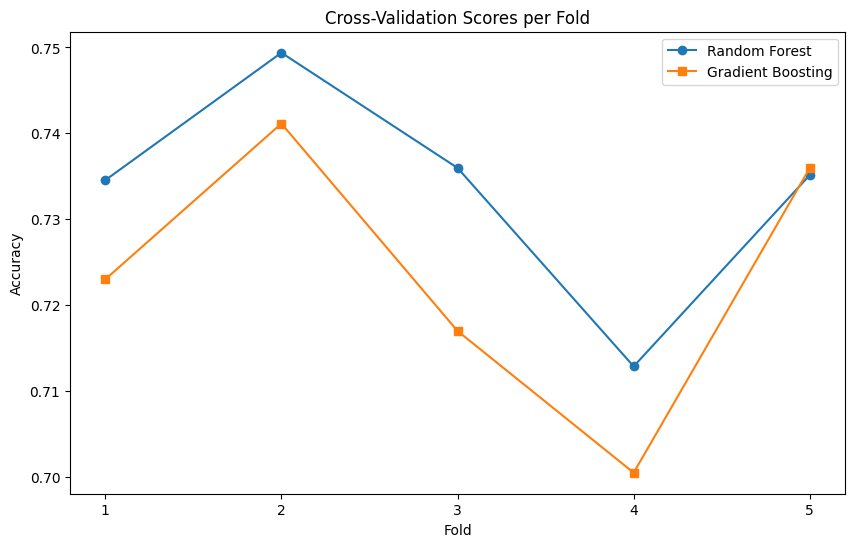

In [ ]:
plt.figure(figsize=(10, 6))
plt.plot(range(1, 6), scores_rf, label="Random Forest", marker='o')
plt.plot(range(1, 6), scores_gb, label="Gradient Boosting", marker='s')
plt.xticks(range(1, 6))
plt.title("Cross-Validation Scores per Fold")
plt.xlabel("Fold")
plt.ylabel("Accuracy")
plt.legend()
plt.show()